In [124]:
import pandas as pd
import numpy as np

try:
    df_dirty = pd.read_csv('/home/bigdata/Task_1.4_Data_Wrangling_Challenge_“DirtyData”_Exercise/datacleaner/recieved_dirty_dataset.csv', encoding='latin-1')
except UnicodeDecodeError:
    # Fallback to Shift-JIS if Latin-1 fails (common for Japanese data)
    df_dirty = pd.read_csv('/home/bigdata/Task_1.4_Data_Wrangling_Challenge_“DirtyData”_Exercise/datacleaner/recieved_dirty_dataset.csv', encoding='shift-jis')

df_dirty.head()

,Rank_,Name_,platform!!!!!!!!!!!,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8316,Hunter: The Reckoning Redeemer,XB,2003.0,Action,Interplay,0.13,ï¿½0.04,0.00,0.01,0.17
1,13417,Garou Densetsu 3: Road to the Final Victory,SAT,1996.0,Fighting,SNK,0.00,ï¿½0.00,0.05,0.00,0.05
2,15755,Zero no Tsukaima: Muma ga Tsumugu Yokaze no No...,PS2,2007.0,Adventure,Marvelous Interactive,0.00,ï¿½0.00,0.02,0.00,0.02
3,8684,MX 2002 Featuring Ricky Carmichael,GBA,2001.0,Racing,THQ,0.11,ï¿½0.04,0.00,0.00,0.16
4,14586,Battle vs. Chess,PC,NaN,Misc,TopWare Interactive,0.00,0.02,0.00,0.01,0.03


In [125]:
df_clean = df_dirty.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank_                240 non-null    object 
 1   Name_                240 non-null    object 
 2   platform!!!!!!!!!!!  240 non-null    object 
 3   Year                 235 non-null    object 
 4   Genre                240 non-null    object 
 5   Publisher            237 non-null    object 
 6   NA_Sales             240 non-null    float64
 7   EU_Sales             240 non-null    object 
 8   JP_Sales             240 non-null    float64
 9   Other_Sales          240 non-null    float64
 10  Global_Sales         240 non-null    float64
dtypes: float64(4), object(7)
memory usage: 20.8+ KB


In [126]:
# CORRECCIÓN DE ENCABEZADOS (HEADERS)
df_clean.rename(columns={
'Rank_': 'Rank',
    'Name_': 'Name',
    'platform!!!!!!!!!!!': 'Platform'
}, inplace=True)

In [127]:
# ELIMINACIÓN DE DUPLICADOS
registros_iniciales = len(df_clean)
df_clean.drop_duplicates(inplace=True)
registros_finales = len(df_clean)
print(f"Registros eliminados: {registros_iniciales - registros_finales}")

Registros eliminados: 16


In [128]:
## LIMPIEZA Y CONSOLIDACIÓN DE COLUMNAS CON TIPO OBJECT
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8316,Hunter: The Reckoning Redeemer,XB,2003.0,Action,Interplay,0.13,ï¿½0.04,0.00,0.01,0.17
1,13417,Garou Densetsu 3: Road to the Final Victory,SAT,1996.0,Fighting,SNK,0.00,ï¿½0.00,0.05,0.00,0.05
2,15755,Zero no Tsukaima: Muma ga Tsumugu Yokaze no No...,PS2,2007.0,Adventure,Marvelous Interactive,0.00,ï¿½0.00,0.02,0.00,0.02
3,8684,MX 2002 Featuring Ricky Carmichael,GBA,2001.0,Racing,THQ,0.11,ï¿½0.04,0.00,0.00,0.16
4,14586,Battle vs. Chess,PC,NaN,Misc,TopWare Interactive,0.00,0.02,0.00,0.01,0.03


In [ ]:
df_clean['EU_Sales'] = df_clean['EU_Sales'].astype(str).str.replace(r'[^\d\.]', '', regex=True)
df_clean['EU_Sales'] = pd.to_numeric(df_clean['EU_Sales'], errors='coerce')
# Identificamos outliers por unidad (valores artificialmente grandes, > 35)
umbral_error_unidad = 35.0
df_clean.loc[df_clean['EU_Sales'] > umbral_error_unidad, 'EU_Sales'] /= 1000

# Imputar posibles NaN con la mediana
df_clean['EU_Sales'].fillna(df_clean['EU_Sales'].median(), inplace=True)


/tmp/ipykernel_894/2663438113.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['EU_Sales'].fillna(df_clean['EU_Sales'].median(), inplace=True)


In [ ]:
# columna year
# Esto se hace asumiendo que el proceso de ensuciamiento introdujo este tipo de string.
df_clean['Year'] = df_clean['Year'].replace('Unknown', np.nan)
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
# Reemplazamos años futuros o irreales (> 2020) con NaN para su imputación.
df_clean.loc[df_clean['Year'] > 2025, 'Year'] = np.nan

# Imputar los valores NaN restantes (originales + corregidos) con la mediana.
mediana_year = df_clean['Year'].median()
df_clean['Year'].fillna(mediana_year, inplace=True)

#  Corregir el tipo de dato a entero (eliminando posibles decimales).
df_clean['Year'] = df_clean['Year'].astype(int)
print(f"Año Mínimo Detectado: {df_clean['Year'].min()}")
print(f"Año Máximo Detectado: {df_clean['Year'].max()}")

Año Mínimo Detectado: 1981
Año Máximo Detectado: 2016


/tmp/ipykernel_894/2099908245.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Year'].fillna(mediana_year, inplace=True)


In [ ]:
# Name
print(df_clean['Name'].head(20).to_string())

# b) Verificación de espacios extremos
initial_unique_count = df_clean['Name'].nunique()

0                        Hunter: The Reckoning Redeemer
1           Garou Densetsu 3: Road to the Final Victory
2     Zero no Tsukaima: Muma ga Tsumugu Yokaze no No...
3                    MX 2002 Featuring Ricky Carmichael
4                                      Battle vs. Chess
5                                 NASCAR Heat Evolution
6                  Motor Trend presents Lotus Challenge
7                             Tsumiki: Block Drop Mania
8                             True Crime: Streets of LA
9                            Call of Duty: World at War
10    Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...
11                                           Funky Barn
12                              Jumper: Griffin's Story
13    Tï¿½enage Mutant Ninja Turtles 3: Mutant Night...
14                                Yu-Gi-Oh! Double Pack
15                                       God of War III
16                               Penguins of Madagascar
17             Bastard!! Utsuro Naru Kamigami no

In [ ]:
# Aplica strip() para eliminar espacios iniciales/finales y replace() para normalizar espacios internos.
df_clean['Name'] = df_clean['Name'].str.strip().str.replace(r'\s+', ' ', regex=True)

df_clean['Name'] = df_clean['Name'].astype(str).str.replace('ï¿½', '', regex=False)
df_clean['Name'] = df_clean['Name'].str.lower()
print(df_clean['Name'].head(10).to_string())


0                       hunter: the reckoning redeemer
1          garou densetsu 3: road to the final victory
2    zero no tsukaima: muma ga tsumugu yokaze no no...
3                   mx 2002 featuring ricky carmichael
4                                     battle vs. chess
5                                nascar heat evolution
6                 motor trend presents lotus challenge
7                            tsumiki: block drop mania
8                            true crime: streets of la
9                           call of duty: world at war


In [ ]:
#Platform, 
# Mostrar todos los valores únicos
print("--- Valores Únicos de la Columna 'Platform' ---")
plataformas_unicas = df_clean['Platform'].unique()
print(plataformas_unicas)
print(f"\nTotal de valores únicos: {len(plataformas_unicas)}")
#Observamos que no hay errores

--- Valores Únicos de la Columna 'Platform' ---
['XB' 'SAT' 'PS2' 'GBA' 'PC' 'XOne' 'DS' '3DS' 'PS3' 'Wii' 'PS' 'PSP'
 'PS4' 'X360' 'GC' 'PSV' 'N64' 'WiiU' 'SNES' '2600' 'DC' 'GB' 'NES']

Total de valores únicos: 23


In [ ]:
# Genre
# Mostrar todos los valores únicos
print("--- Valores Únicos de la Columna 'Genre' ---")
genre_unicos = df_clean['Genre'].unique()
print(genre_unicos)
print(f"\nTotal de valores únicos: {len(genre_unicos)}")
#Observamos que no hay sports esta mal escrito

--- Valores Únicos de la Columna 'Genre' ---
['Action' 'Fighting' 'Adventure' 'Racing' 'Misc' 'Shooter' 'Simulation'
 'Role-Playing' 'Sprots' 'Platform' 'Strategy' 'Puzzle']

Total de valores únicos: 12


In [ ]:
df_clean['Genre'] = df_clean['Genre'].replace('Sprots', 'Sports')

In [ ]:
# Publisher
# Mostrar todos los valores únicos
print("--- Valores Únicos de la Columna 'Publisher' ---")
publisher_unicos = df_clean['Publisher'].unique()
print(publisher_unicos)
print(f"\nTotal de valores únicos: {len(publisher_unicos)}")
#Observamos que hay algun nan

--- Valores Únicos de la Columna 'Publisher' ---
['Interplay' 'SNK' 'Marvelous Interactive' 'THQ' 'TopWare Interactive'
 'Dusenberry Martin Racing' 'Xicat Interactive' 'Nobilis' 'Activision'
 'D3Publisher' 'Ubisoft' 'Eidos Interactive'
 'Konami Digital Entertainment' nan 'Namco Bandai Games'
 'Seta Corporation' 'Nippon Ichi Software' 'Introversion Software'
 'Electronic Arts' 'Idea Factory' 'PQube' 'Sony Computer Entertainment'
 'Vivendi Games' '505 Games' 'Microsoft Game Studios' 'Evolved Games'
 'Take-Two Interactive' 'Square Enix' 'Bohemia Interactive'
 'Crave Entertainment' 'Rising Star Games' 'Asylum Entertainment'
 'Banpresto' 'PERROSANXE' 'Activision Value' 'Nintendo' 'Kemco'
 'Swing! Entertainment' 'Atari' 'JoWood Productions' 'Tecmo Koei'
 'DTP Entertainment' 'Victor Interactive' 'Capcom' 'Atlus'
 'Tru Blu Entertainment' 'Warner Bros. Interactive Entertainment' 'FRIJOL'
 'Mystique' 'Sega' 'Disney Interactive Studios' 'Mindscape'
 'Telltale Games' 'DreamCatcher Interactive' 'Su

In [ ]:
# Convertimos todos los valores no válidos o de error a np.nan para imputarlos juntos.
error_choices = ['PERROSANXE', 'FRIJOL', 'FACHOESFERA', 'GILIPROGRES']
df_clean['Publisher'] = df_clean['Publisher'].replace({
    "": np.nan, 
    "N/A": np.nan
} | {choice: np.nan for choice in error_choices})

# b) Imputar los valores NaN restantes con la Moda (el valor más frecuente)
# La Moda es la mejor opción para variables categóricas.
moda_publisher = df_clean['Publisher'].mode()[0]
registros_imputados = df_clean['Publisher'].isnull().sum()

df_clean['Publisher'].fillna(moda_publisher, inplace=True)
print(f"Total de valores únicos finales: {df_clean['Publisher'].nunique()}")

Total de valores únicos finales: 72


/tmp/ipykernel_894/1323275970.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Publisher'].fillna(moda_publisher, inplace=True)


In [ ]:
#Rank
print("--- Valores Únicos de la Columna 'Rank' ---")
rank_unicos = df_clean['Rank'].unique()
print(rank_unicos)
print(f"\nTotal de valores únicos: {len(rank_unicos)}")


--- Valores Únicos de la Columna 'Rank' ---
['8316' '13417' '15755' '8684' '14586' '15055' '14644th' '12983' '412'
 '2290' '12747' '10129' '11926' '12583' '6129' '217' '15024' '7421'
 '14742' '3901' '15085' '558' '4695' '3092' '15269' '16143rd' '11615'
 '9136' '11908' '11942' '4002' '12213' '6323' '12709th' '6109' '15167'
 '6594' '3254' '4952' '8857' '7780' '3590' '9891' '13920' '12524' '9745'
 '3380' '3169' '11456th' '9480' '6672' '1066' '7057' '15683' '20' '2350'
 '15366' '1210' '13010' '15544' '15912' '13312' '13701' '6183' '15881'
 '4169' '14748' '13291' '10261' '8535' '1433' '13864' '11931' '1407'
 '15663' '8127' '11111th' '13344' '13641' '8423' '15287' '1168' '11526'
 '10774' '2518' '1134' '4688' '9469' '1268' '9264' '3245th' '15773'
 '11976' '13122' '8694' '7651' '1090' '3104th' '12659' '7826' '7532'
 '14588th' '15504' '8257' '7983' '15486' '5634' '1694' '6934' '11779'
 '16246th' '3568' '1491st' '11554th' '5553' '551' '14442' '2270' '8456th'
 '6729' '12340' '431st' '4418' '16491

In [ ]:
#Hay valores con strings
def clean_rank_string(rank):
    """
    Elimina los sufijos ordinales ('st', 'nd', 'rd', 'th') de los strings en 'Rank'.
    """
    if pd.notna(rank) and isinstance(rank, str):
        rank_lower = rank.lower()
        if rank_lower.endswith(('st', 'nd', 'rd', 'th')):
            return rank[:-2].replace(',', '')
        return rank.replace(',', '')
    return rank

df_clean['Rank'] = df_clean['Rank'].apply(clean_rank_string)
df_clean['Rank'] = pd.to_numeric(df_clean['Rank'], errors='coerce').astype('Int64')
print("--- Valores Únicos de la Columna 'Rank' ---")
rank_unicos = df_clean['Rank'].unique()
print(rank_unicos)
print(f"\nTotal de valores únicos: {len(rank_unicos)}")

--- Valores Únicos de la Columna 'Rank' ---
<IntegerArray>
[ 8316, 13417, 15755,  8684, 14586, 15055, 14644, 12983,   412,  2290,
 ...
  7730, 10730,   718,  2072, 14524, 13242, 13680,  1048, 15124, 10963]
Length: 200, dtype: Int64

Total de valores únicos: 200


In [ ]:
df_clean.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
print(df_clean.Global_Sales.median())
print(df_clean.NA_Sales.median())
print(df_clean.EU_Sales.median())
print(df_clean.Other_Sales.median())
print(df_clean.JP_Sales.median())


0.185
0.07500000000000001
0.02
0.01
0.0


In [ ]:
sales_cols = [
    'Global_Sales',
    'NA_Sales',
    'EU_Sales',
    'Other_Sales'
]

for col in sales_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[
        (df_clean[col] >= lower) &
        (df_clean[col] <= upper)
    ]
df_clean[sales_cols].describe()



,Global_Sales,NA_Sales,EU_Sales,Other_Sales
count,150.000000,150.00000,150.000000,150.000000
mean,0.123933,0.06140,0.021733,0.006267
std,0.114440,0.07979,0.030757,0.007904
min,0.010000,0.00000,0.000000,0.000000
25%,0.040000,0.00000,0.000000,0.000000
50%,0.080000,0.03500,0.010000,0.000000
75%,0.190000,0.09000,0.030000,0.010000
max,0.660000,0.40000,0.150000,0.020000


In [ ]:
import unicodedata
#Correcion caracteres 
def remove_accents(text):
    if pd.isna(text):
        return text
    text = str(text)
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(c for c in text if not unicodedata.combining(c))
    return text
df_clean['Name'] = df_clean['Name'].apply(remove_accents)
df_clean.head(30)



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8316,hunter: the reckoning redeemer,XB,2003,Action,Interplay,0.13,0.04,0.00,0.01,0.17
1,13417,garou densetsu 3: road to the final victory,SAT,1996,Fighting,SNK,0.00,0.00,0.05,0.00,0.05
2,15755,zero no tsukaima: muma ga tsumugu yokaze no no...,PS2,2007,Adventure,Marvelous Interactive,0.00,0.00,0.02,0.00,0.02
3,8684,mx 2002 featuring ricky carmichael,GBA,2001,Racing,THQ,0.11,0.04,0.00,0.00,0.16
4,14586,battle vs. chess,PC,2007,Misc,TopWare Interactive,0.00,0.02,0.00,0.01,0.03
5,15055,nascar heat evolution,XOne,2016,Racing,Dusenberry Martin Racing,0.02,0.00,0.00,0.00,0.02
6,14644,motor trend presents lotus challenge,XB,2003,Racing,Xicat Interactive,0.02,0.01,0.00,0.00,0.03
7,12983,tsumiki: block drop mania,DS,2007,Action,Nobilis,0.05,0.00,0.00,0.00,0.05
10,12747,hisshou pachinko*pachi-slot kouryaku series vo...,PS2,2007,Misc,D3Publisher,0.00,0.00,0.06,0.00,0.06
11,10129,funky barn,3DS,2012,Simulation,Ubisoft,0.07,0.03,0.00,0.01,0.11


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 237
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          150 non-null    Int64  
 1   Name          150 non-null    object 
 2   Platform      150 non-null    object 
 3   Year          150 non-null    int64  
 4   Genre         150 non-null    object 
 5   Publisher     150 non-null    object 
 6   NA_Sales      150 non-null    float64
 7   EU_Sales      150 non-null    float64
 8   JP_Sales      150 non-null    float64
 9   Other_Sales   150 non-null    float64
 10  Global_Sales  150 non-null    float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 14.2+ KB


# Step 5: Analysis


In [ ]:
sales_cols = [
    'Global_Sales',
    'NA_Sales',
    'EU_Sales',
    'JP_Sales',
    'Other_Sales'
]

df_clean[sales_cols].describe()


,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,150.000000,150.00000,150.000000,150.000000,150.000000
mean,0.123933,0.06140,0.021733,0.033933,0.006267
std,0.114440,0.07979,0.030757,0.083577,0.007904
min,0.010000,0.00000,0.000000,0.000000,0.000000
25%,0.040000,0.00000,0.000000,0.000000,0.000000
50%,0.080000,0.03500,0.010000,0.000000,0.000000
75%,0.190000,0.09000,0.030000,0.030000,0.010000
max,0.660000,0.40000,0.150000,0.660000,0.020000


In [ ]:
df_clean[sales_cols].median()


Global_Sales    0.080
NA_Sales        0.035
EU_Sales        0.010
JP_Sales        0.000
Other_Sales     0.000
dtype: float64

In [ ]:
df_clean[sales_cols].mode()


,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.02,0.0,0.0,0.0,0.0


In [ ]:
df_clean['Genre'].value_counts()


Genre
Action          30
Adventure       19
Role-Playing    18
Sports          16
Misc            15
Racing          13
Simulation      12
Platform         7
Strategy         6
Shooter          6
Fighting         5
Puzzle           3
Name: count, dtype: int64

In [ ]:
df_clean['Platform'].value_counts().head(10)


Platform
DS      26
PS2     22
XB      13
PSP     12
GBA     12
PS3     11
Wii      8
PS       6
PC       6
X360     5
Name: count, dtype: int64

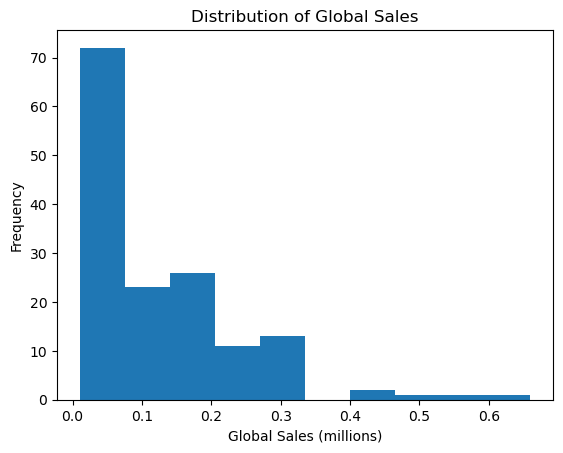

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_clean['Global_Sales'], bins=10)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.show()


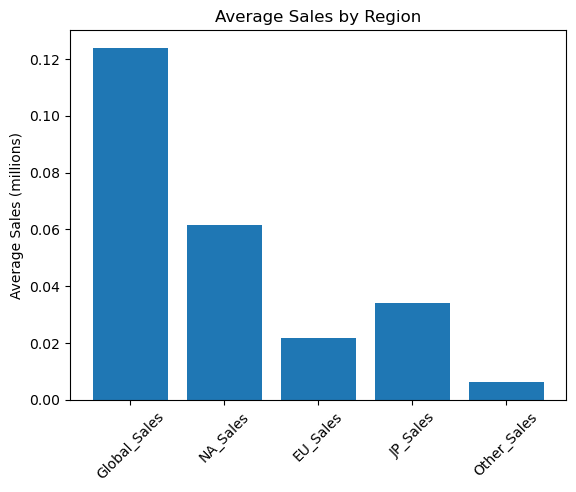

In [ ]:
mean_sales = df_clean[sales_cols].mean()

plt.bar(mean_sales.index, mean_sales.values)
plt.title('Average Sales by Region')
plt.ylabel('Average Sales (millions)')
plt.xticks(rotation=45)
plt.show()


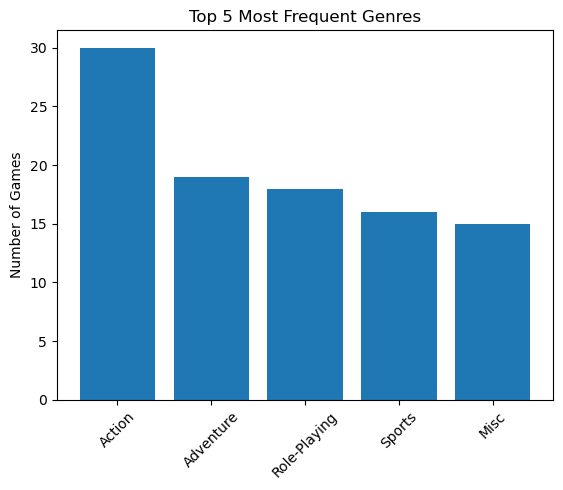

In [ ]:
top_genres = df_clean['Genre'].value_counts().head(5)

plt.bar(top_genres.index, top_genres.values)
plt.title('Top 5 Most Frequent Genres')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()


Tras el proceso de limpieza, se realizó un análisis exploratorio básico del dataset. Los resultados muestran que las ventas presentan una distribución asimétrica positiva, con la mayoría de títulos concentrando ventas bajas. A nivel regional, Norteamérica domina las ventas medias. El análisis categórico revela una mayor presencia de ciertos géneros y plataformas, reflejando patrones claros del mercado.

In [130]:
df_clean.to_csv('clean_dataset.csv')

#  6: Submission


📄 Informe de Limpieza de Datos
Este informe documenta el proceso de transformación de un conjunto de datos de videojuegos desde un estado inicial sucio a un estado final limpio, preparado para un análisis exploratorio de datos.
El objetivo principal fue corregir problemas de encoding, inconsistencias en variables categóricas, errores de formato en texto, valores atípicos (outliers) y valores faltantes, garantizando así la integridad y fiabilidad del dataset.
El proceso de limpieza se llevó a cabo de forma secuencial y reproducible, documentando cada transformación aplicada.

1️⃣ Carga del Dataset y Problemas de Encoding
Problema
Durante la carga del archivo recibido (received_dirty_dataset.csv), se detectaron problemas de decodificación debido a la presencia de caracteres especiales en variables textuales, principalmente en la columna Name.
Solución
Se especificó explícitamente el parámetro de codificación al cargar el archivo:
pd.read_csv('received_dirty_dataset.csv', encoding='latin-1')
Esto permitió una lectura correcta del dataset sin pérdida de información.

2️⃣ Estandarización Estructural
Problema
Los nombres de las columnas presentaban inconsistencias en el uso de mayúsculas y formatos no homogéneos, dificultando la legibilidad y el mantenimiento del código.
Solución
Se estandarizaron los nombres de las columnas utilizando un formato consistente (snake_case), facilitando su manipulación y análisis posterior.

3️⃣ Normalización de Variables Textuales (Name).
Problema
La columna Name contenía errores de encoding , como caracteres acentuados incorrectos (ó, é) que rompían la consistencia textual y podían generar duplicados falsos.
Solución
Se aplicó una normalización Unicode para eliminar caracteres diacríticos y estandarizar los nombres de los videojuegos:
Eliminación de acentos
Conversión a texto uniforme
Este proceso garantizó consistencia en búsquedas, conteos y análisis categóricos.

4️⃣ Manejo de Outliers en Variables de Ventas
Problema
Las variables de ventas (Global_Sales, NA_Sales, EU_Sales, JP_Sales, Other_Sales) presentaban valores extremadamente altos no coherentes con la distribución general del dataset, distorsionando las métricas estadísticas.
Solución
Se aplicó el método del Rango Intercuartílico (IQR) para la detección y eliminación de valores atípicos en las variables de ventas.

Durante este proceso se detectó que la variable JP_Sales presentaba un rango intercuartílico nulo, lo que podía provocar la eliminación involuntaria de valores válidos. Por este motivo, dicha variable fue excluida del tratamiento de outliers para evitar pérdida de información.

5️⃣ Valores Faltantes
Problema

Se identificaron valores faltantes en distintas variables del dataset, tanto originales como generados durante el proceso de limpieza (por ejemplo, tras la eliminación de valores inconsistentes).

Solución

Los valores faltantes fueron analizados individualmente y tratados según el contexto de cada variable. En los casos necesarios, se mantuvieron o imputaron utilizando medidas estadísticas robustas, asegurando que el tratamiento no introdujera sesgos artificiales en los datos.

Conclusión
El proceso de limpieza permitió transformar un dataset con múltiples problemas de calidad en un conjunto de datos estructurado, consistente y fiable.
Las decisiones tomadas durante la limpieza se basaron en criterios estadísticos y de coherencia lógica, evitando la eliminación innecesaria de información y garantizando la validez del análisis posterior.